# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Domingo Domingo 8 de septiembre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte A

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [112]:
# Resolver acá
import requests
# Así se ve la búsqueda en el navegador:
# https://listado.mercadolibre.com.ar/tejo

# Al usar la API tenemos que seguir este formato:
# https://api.mercadolibre.com/sites/MLA/search?q=nombre%20tejo

# Notar que:
# $SITE_ID: MLA  # MLA es el sitio de Argentina
# item: item a buscar. (reemplazamos los espacios con %20)

buscar = "tejo"
url = "https://api.mercadolibre.com/sites/MLA/search?q=nombre%20tejo".format("MLA", buscar.replace(" ", "%20"))

# Hacemos el pedido o request y obtenemos la response
response = requests.request("GET", url)
print(response) # correcto

# Vemos el texto
response.text

# Pero podríamos guardar el resultado en un diccionario (json)
data = response.json()
#type(data) # dict
data

<Response [200]>


{'site_id': 'MLA',
 'country_default_time_zone': 'GMT-03:00',
 'query': 'nombre tejo',
 'paging': {'total': 332, 'primary_results': 0, 'offset': 0, 'limit': 50},
 'results': [{'id': 'MLA1491175554',
   'title': 'Tejo De Goma Profesional, Para Todo Tipo De Superficies',
   'condition': 'new',
   'thumbnail_id': '830923-MLU73202292411_122023',
   'catalog_product_id': 'MLA26694589',
   'listing_type_id': 'gold_special',
   'sanitized_title': 'tejo-de-goma-profesional-para-todo-tipo-de-superficies',
   'permalink': 'https://www.mercadolibre.com.ar/tejo-de-goma-profesional-para-todo-tipo-de-superficies/p/MLA26694589#wid=MLA1491175554&sid=unknown',
   'buying_mode': 'buy_it_now',
   'site_id': 'MLA',
   'category_id': 'MLA90312',
   'domain_id': 'MLA-BEACH_TEJOS',
   'thumbnail': 'http://http2.mlstatic.com/D_830923-MLU73202292411_122023-I.jpg',
   'currency_id': 'ARS',
   'order_backend': 1,
   'price': 17800,
   'original_price': None,
   'sale_price': {'price_id': '',
    'amount': 17800,

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [93]:
!pip install requests
!pip install pandas


In [150]:
# Resolver acá

items = data.get("results", []) #Extraemos los resultados de búsqueda (una lista de ítems) del diccionario data. Si no hay resultados, devuelve una lista vacía.
#items
prices = [item['price'] for item in items if 'price' in item] #Esta lista de comprensión recorre cada ítem en items y extrae el precio (item['price']) de aquellos ítems que tienen el campo price.
#prices
df = pd.DataFrame(prices, columns=["Precio"]) #Creamos un DataFrame de pandas con una columna llamada "Precio" que contiene los precios extraídos.
df

preciopromedio = df["Precio"].mean()
preciomin = df["Precio"].min()
preciomax = df["Precio"].max()

preciopromedio 
preciomin 
preciomax 


94800.0

#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

In [116]:
import matplotlib.pyplot as plt

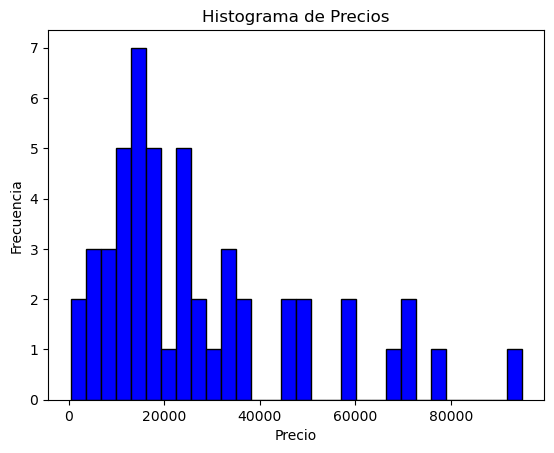

In [136]:
# Resolver acá
plt.hist(df, bins=30, color='blue', edgecolor='black')

# Añadir títulos y etiquetas
plt.title('Histograma de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

#Puede ser que hay un outlier en el precio 15.000 pesos aproximadamente.

#### Ejercicio 4
Realicen alguna consulta adicional utilizando la API de Mercado Libre (debe ser alguna consulta que no se haya visto en clase. Por ejemplo, obtener los ítems de un vendedor en particular, obtener los productos de una categoría u otros). Analicen los resultados y comenten uno o dos que les parezcan interesantes (por ejemplo, precios promedio de los productos de un vendedor, diferencia entre el precio original y actual, si acepta mercado pago para la compra de productos, etc.) 

In [232]:
# Resolver acá
import requests
# Así se ve la búsqueda en el navegador:
# https://www.mercadolibre.com.ar/ofertas/supermercado#menu=categories

# Al usar la API tenemos que seguir este formato:
# https://api.mercadolibre.com/sites/MLA/search?q=nombre%20ofertas/supermercado#menu=categories

# Notar que:
# $SITE_ID: MLA  # MLA es el sitio de Argentina
# item: item a buscar. (reemplazamos los espacios con %20)

buscar = "supermercado"
url = " https://api.mercadolibre.com/sites/MLA/search?q=nombre%20ofertas/supermercado#menu=categories".format("MLA", buscar.replace(" ", "%20"))

# Hacemos el pedido o request y obtenemos la response
response = requests.request("GET", url)
print(response) # correcto

# Vemos el texto
response.text

# Pero podríamos guardar el resultado en un diccionario (json)
data = response.json()
#type(data) # dict
data

resultados = data.get('results', [])
resultados

 # Inicializamos variables para análisis
precios = []
acepta_mercadopago = 0
    
for producto in resultados: # Agregamos los precios a la lista
    precios.append(producto['price']) 
    if producto['accepts_mercadopago']: # Verificamos si acepta Mercado Pago
        acepta_mercadopago += 1
        
        # Imprimimos algunos datos del producto
        print(f"Producto: {producto['title']}")
        print(f"Precio: {producto['price']} {producto['currency_id']}")
        print(f"Acepta Mercado Pago: {producto['accepts_mercadopago']}")
        print("------")

    # Realizamos análisis
    if precios:
        precio_promedio = sum(precios) / len(precios)
        print(f"El precio promedio de los productos es: {precio_promedio}")
        print(f"Productos que aceptan Mercado Pago: {acepta_mercadopago}/{len(resultados)}")
else:
    print(f"Error en la solicitud: {response.status_code}")

<Response [200]>
Producto: Neutrogena Purified Skin Agua Micelar 7 En 1 200ml
Precio: 6900 ARS
Acepta Mercado Pago: True
------
El precio promedio de los productos es: 6900.0
Productos que aceptan Mercado Pago: 1/50
Producto: Agua Micelar Bifásica Neutrogena Hydro Boost X 200 Ml
Precio: 10177.03 ARS
Acepta Mercado Pago: True
------
El precio promedio de los productos es: 8538.515
Productos que aceptan Mercado Pago: 2/50
Producto:  Neutrogena Night Calming Toallitas Desmaquillantes 25 Unidades
Precio: 4953.89 ARS
Acepta Mercado Pago: True
------
El precio promedio de los productos es: 7343.639999999999
Productos que aceptan Mercado Pago: 3/50
Producto: Juguete De Construccion Set Herramientas Oferta Babymovil
Precio: 4177.96 ARS
Acepta Mercado Pago: True
------
El precio promedio de los productos es: 6552.219999999999
Productos que aceptan Mercado Pago: 4/50
Producto: T01 Cartel Para Precio Super Oferta Supermercado
Precio: 211109.2 ARS
Acepta Mercado Pago: True
------
El precio promedi

### Parte B

#### Ejercicio 5
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/), utilicen herramientas de web scraping para obtener los links de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [218]:
# Resolver acá
import requests
from bs4 import BeautifulSoup
import pandas as pd
import datetime

# URL de la portada de La Nación
url = "https://www.lanacion.com.ar/"

# Realizar la solicitud GET
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Parsear el contenido de la página con BeautifulSoup
    soup = BeautifulSoup(response.content, "html.parser")
    
    # Lista para almacenar los links
    links = []
    
    # Buscar todas las etiquetas <a> dentro de contenedores de noticias
    for article in soup.find_all('article'):
        a_tag = article.find('a', href=True)  # Buscar las etiquetas <a> con 'href'
        if a_tag:
            href = a_tag['href']
            if not href.startswith('http'):
                # Concatenar el dominio si el link es relativo
                href = "https://www.lanacion.com.ar" + href
            links.append(href)

    # Crear un DataFrame con los links obtenidos
    df = pd.DataFrame(links, columns=['Links'])

    # Guardar el DataFrame en un archivo Excel
    fecha_actual = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
    nombre_archivo = f"links_noticias_lanacion_{fecha_actual}.xlsx"
    df.to_excel(nombre_archivo, index=False)

    print(f"Links obtenidos y guardados en el archivo: {nombre_archivo}")
else:
    print(f"Error al acceder a la página: {response.status_code}")

Links obtenidos y guardados en el archivo: links_noticias_lanacion_2024-09-08_18-43-07.xlsx
